## Assignment for Week 5 - Neural Network

### Project:
#### Neural Networks
Credit Card Fraud data: https://www.kaggle.com/mlg-ulb/creditcardfraud/

- Make at least 2 EDA plots – histograms, correlation plots (df.corr() in python/pandas, and seaborn’s heatmap can plot it), scatter/line plots, etc.
- Use a neural net to predict if a transaction is fraud or not (you will have to change the loss function from mse/mae to something for binary classification)
- Plot the training and validation loss
- Report the performance on the training and test set with accuracy and confusion matrices
- Write some interpretation of all your results/plots

### Deliverables:

Upload your notebook's .ipynb file. 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# Assignment Solution

# Prediction of Credit Card Fraud

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [1]:
# Step 1:  Load all the required libraries

# Load data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Step 2: Load the data set
credit_data = pd.read_csv("F:/Balaram/ML course/creditcard/creditcard.csv")

In [3]:
# Step 3: Basic data visualization 

# Display the first few rows and info
print(credit_data.head())
print(credit_data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Observations

Given data has 31 attributes, where first 30 attributes are input features and the output feature is class (A binary feature) 

0 refers to not fraud and 1 refers fraud. 

No of data points: 284807, 

All the attributes are numerical features only 

In [4]:
# Check for missing values
print(credit_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There is no missing values in the dataset

In [5]:
# Display basic information about the dataset
print(credit_data.info())
print(credit_data['Class'].value_counts())
# Display class distribution information in fraction
print(credit_data['Class'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The given data has 

Not fraud transaction = 284315 (99.83%)
Fraud transactions = 492 (0.172 %)

Clearly data has very few minor class groups and thus the data is imbalanced. 

Lets start with handling this data as it is. 

# Stepp 3: Exploratory Data Analysis (EDA)

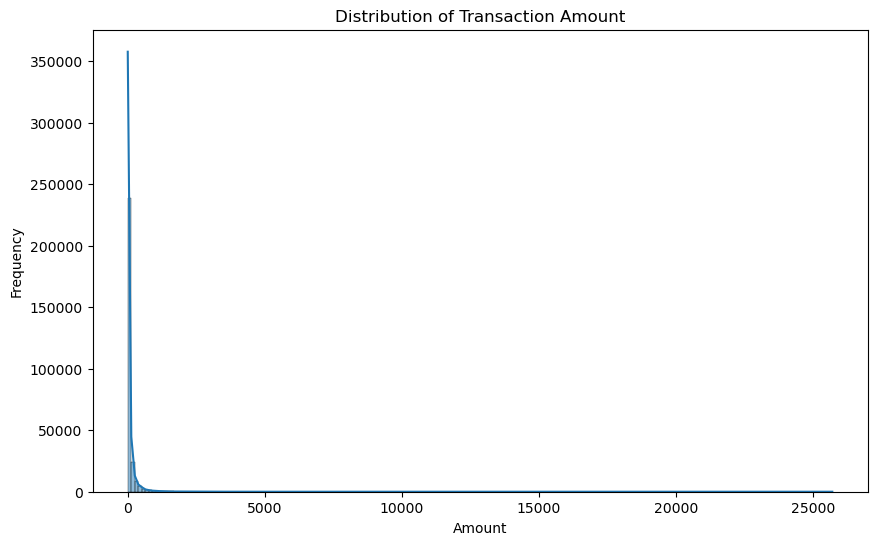

In [6]:
# 1. Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Amount'], bins=200, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

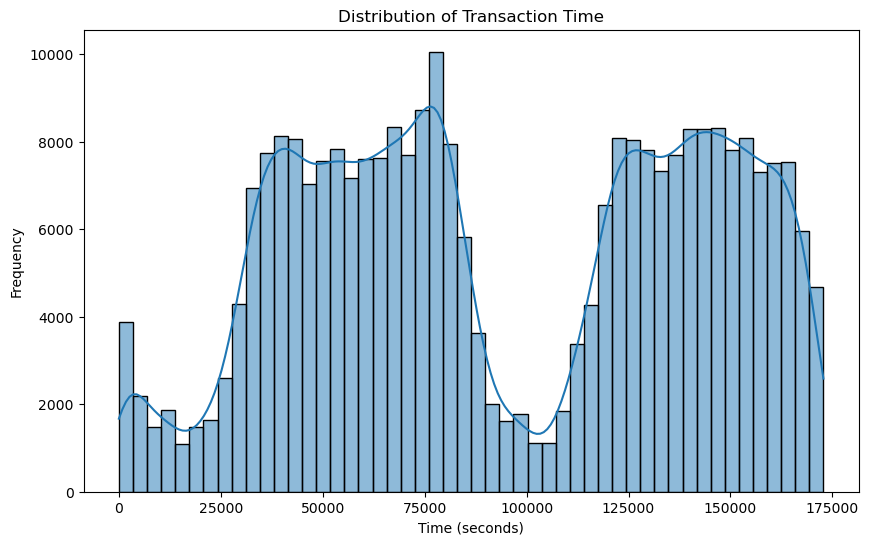

In [7]:
# 2. Transaction Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

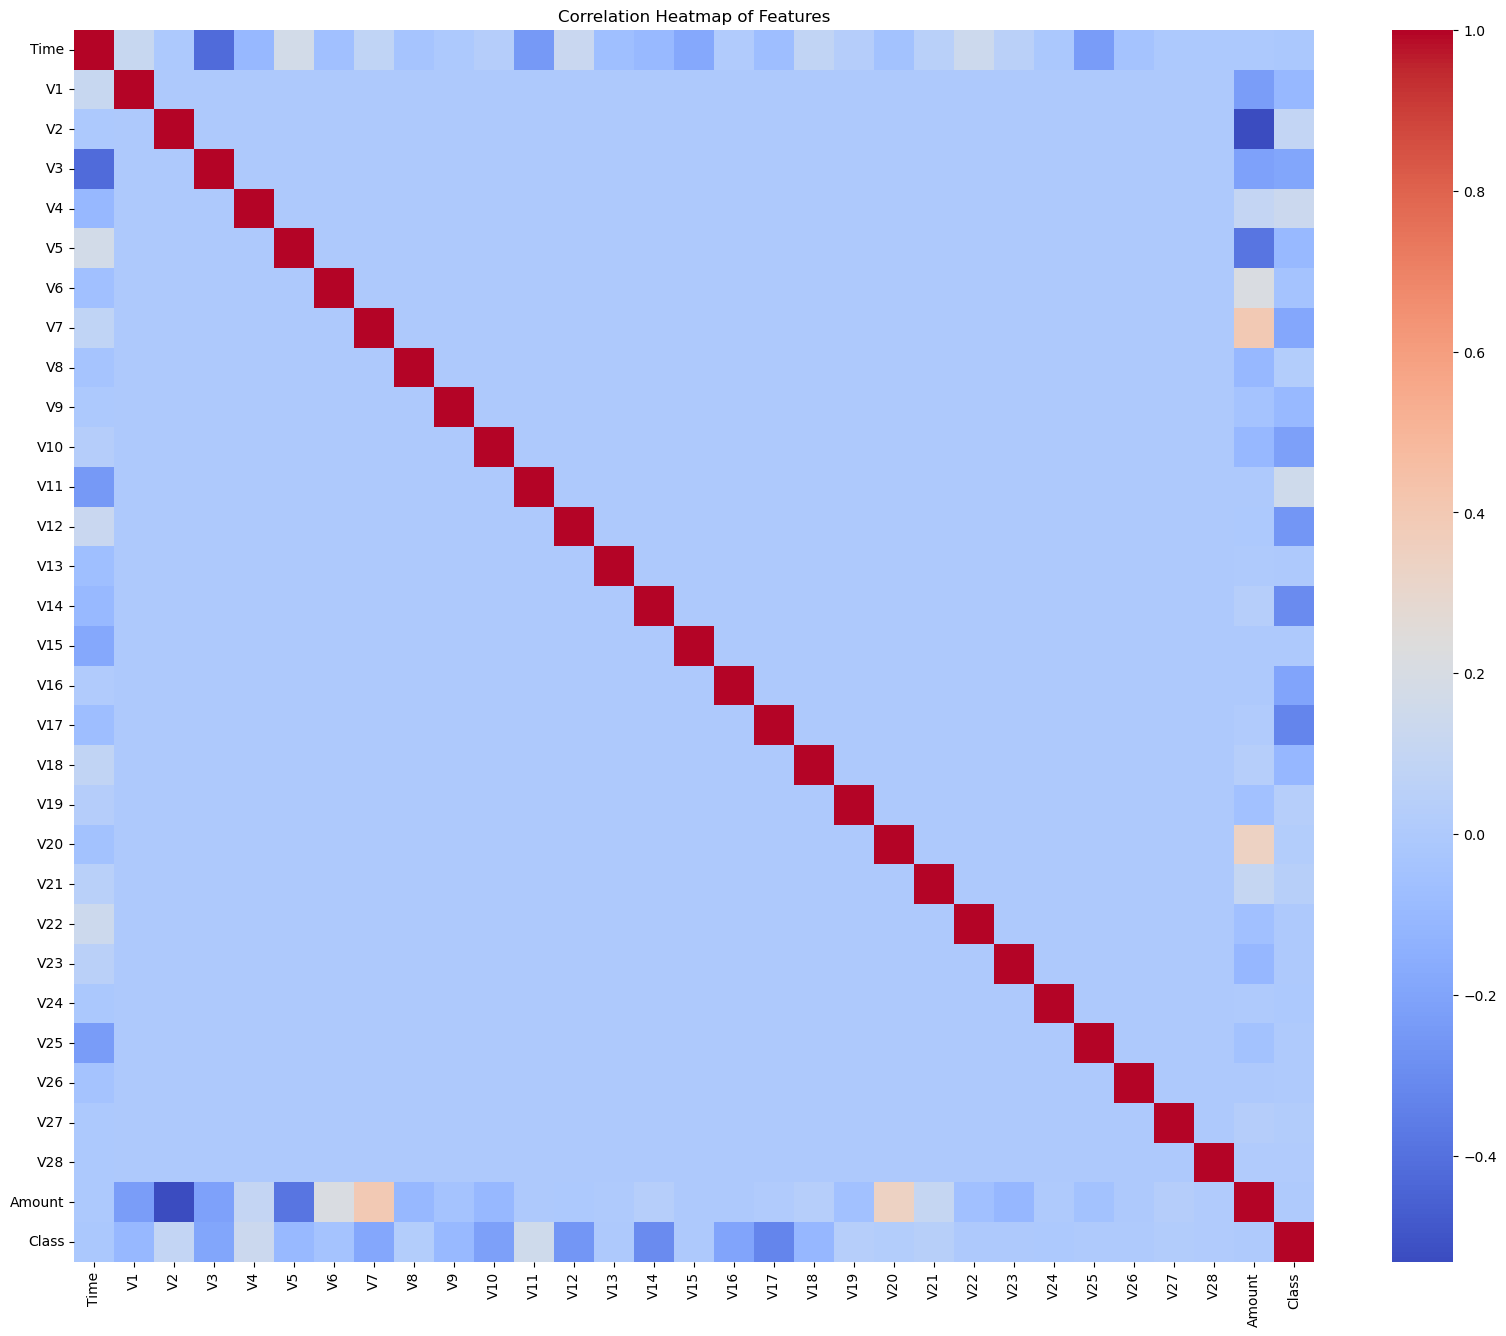

In [8]:
# 3. Correlation Heatmap
plt.figure(figsize=(20, 16))
corr = credit_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

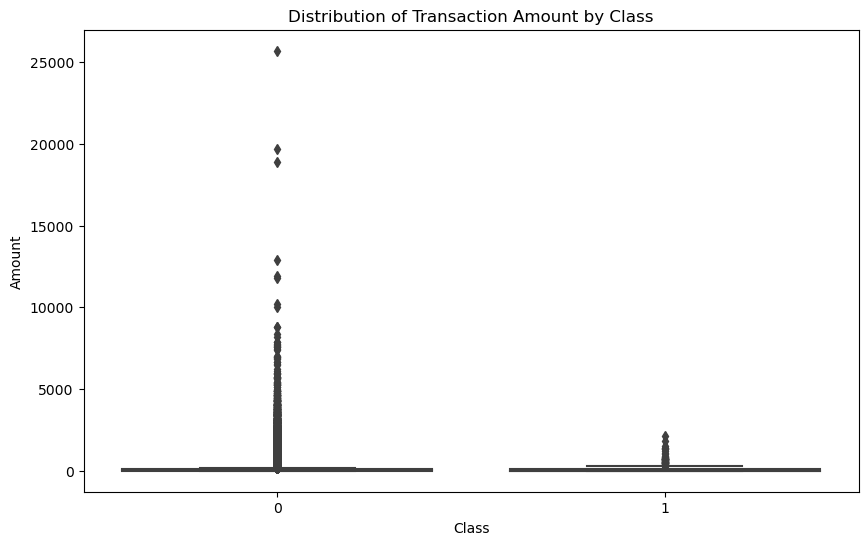

In [9]:
# 4. Box Plot of Amount by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_data)
plt.title('Distribution of Transaction Amount by Class')
plt.show()

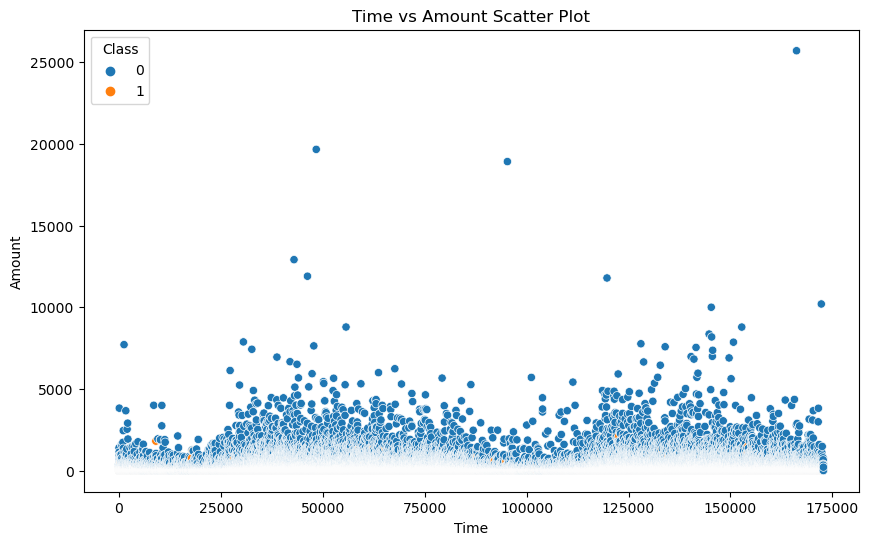

In [10]:
# 5. Scatter Plot of Time vs Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_data)
plt.title('Time vs Amount Scatter Plot')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


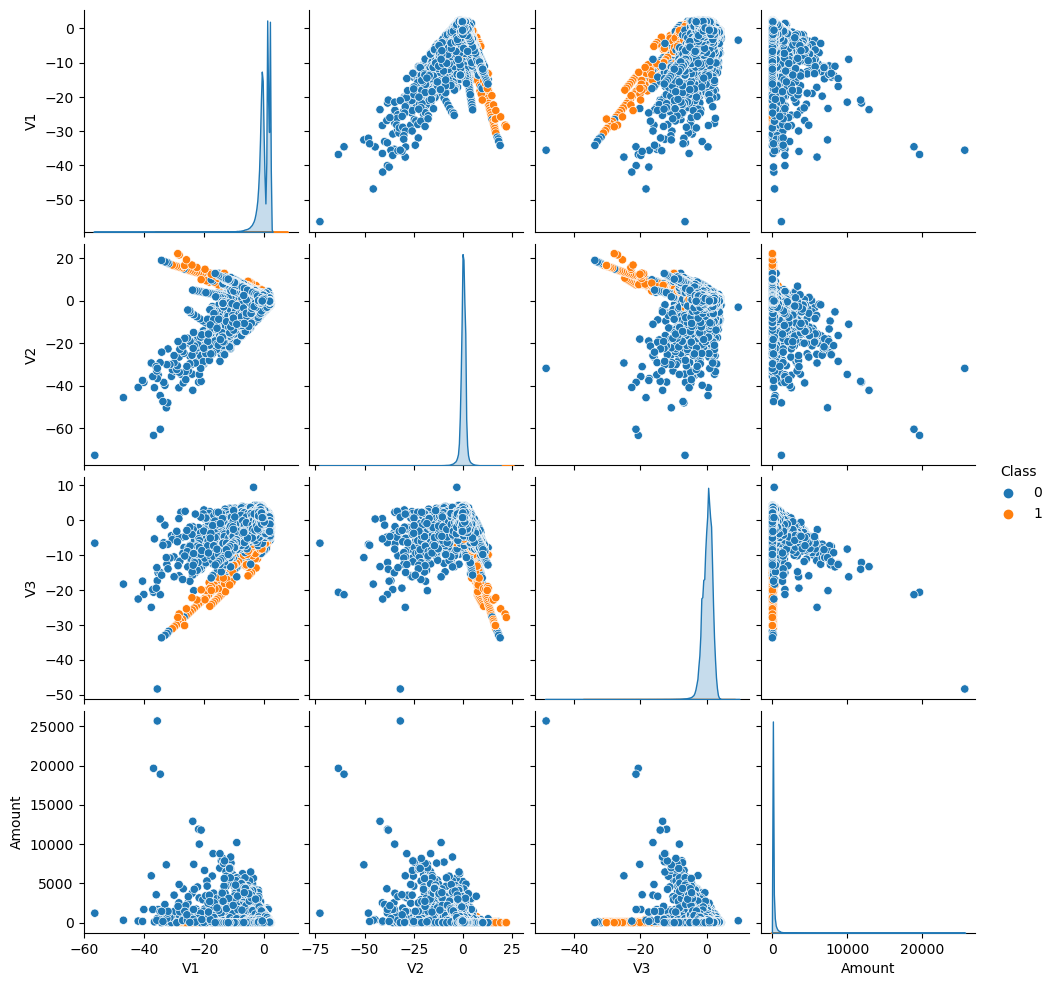

In [11]:
# 7. Pair Plot of selected features
sns.pairplot(credit_data[['V1', 'V2', 'V3', 'Amount', 'Class']], hue='Class')
plt.show()

# EDA Plots:

1. Transaction Amount Distribution: Shows the distribution of transaction amounts, helping identify any unusual patterns or outliers. Clearly the data is skewed alot on the right side and it has outliers

2. Transaction Time Distribution: Reveals patterns in transaction timing, which could be useful for detecting fraudulent behavior. 

3. Correlation Heatmap: Highlights relationships between features, helping identify potential multicollinearity. We can see correlations mostly across time, amount and class most of the other attrbutes seem to be independent. The correlation among these is also small (max ~ 0.4)

4. Box Plot of Amount by Class: Compares transaction amounts between fraudulent and non-fraudulent transactions. non fraudlant is distributed over the very wide amounts where as most of the fraudlent transactions are less i.e., < 5000

5. Scatter Plot of Time vs Amount: Visualizes the relationship between transaction time and amount, colored by class. This plot is highlighting that we have very few fraudlant data and hence i cant segregate and identify any relation ship

6. Pair Plot: Visualizes relationships between selected features and the target variable. based on these plots we didnnot fine any simple or linear correlations of the features w.r.t class and thus need to model using complex models such as NN. (as we dont fine any simple linear relations ships)

# Step 4 : Building Neural Network Model 

In [12]:
# Data preprocessing
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

# Split the data in to test and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Scaling the features (using Standardscaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Building the neural network model 
model = Sequential([
    Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)), # Input layer
    Dropout(0.3),
    Dense(1, activation='sigmoid'), # just a single neuron in hidden layer
    Dense(1, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Subhadra_Princess\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# loss function for Binary classification 

Binary Cross-Entropy Loss
Binary cross-entropy is specifically designed for binary classification tasks where the output is a probability between 0 and 1. It measures the performance of a classification model whose output is a probability value between 0 and 1.

The formula for binary cross-entropy loss is:

<img src="F:/Balaram/ML course/HlYNr.png">

Where:

N is the number of samples

y_i is the true label (0 or 1)

p_i is the predicted probability of the positive class

This loss function penalizes confident and wrong predictions more than less confident ones. For example, predicting a probability of 0.9 for a negative example (actual label 0) would incur a high loss, while predicting 0.55 for the same example would incur a lower loss.

In [14]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9361 - loss: 0.3582 - val_accuracy: 0.9981 - val_loss: 0.0368
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9983 - loss: 0.0250 - val_accuracy: 0.9981 - val_loss: 0.0115
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9983 - loss: 0.0102 - val_accuracy: 0.9981 - val_loss: 0.0088
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9981 - loss: 0.0086 - val_accuracy: 0.9981 - val_loss: 0.0071
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9981 - val_loss: 0.0057
Epoch 6/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9981 - val_loss: 0.0047
Epoch 7/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 8/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9994 - loss

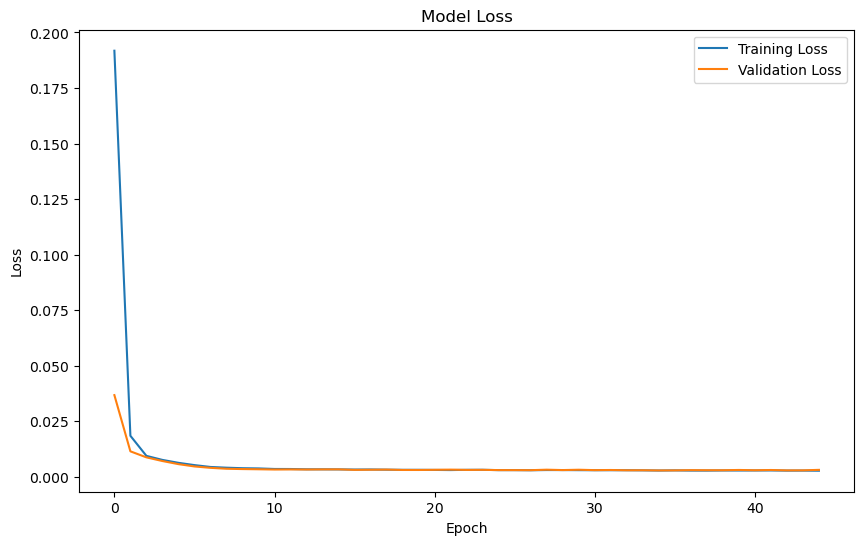

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.81      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56849    15]
 [   19    79]]


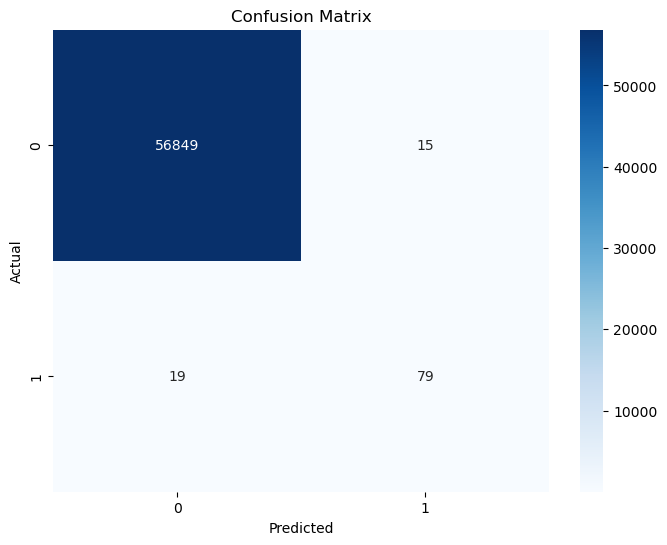

In [15]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Building the neural network model 
model = Sequential([
    Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)), # Input layer
    Dropout(0.3),
    Dense(5, activation='sigmoid'), # just a single neuron in hidden layer
    Dense(1, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


C:\Users\Subhadra_Princess\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9462 - loss: 0.1544 - val_accuracy: 0.9981 - val_loss: 0.0074
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 7/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9995 - loss: 0.0030 - val

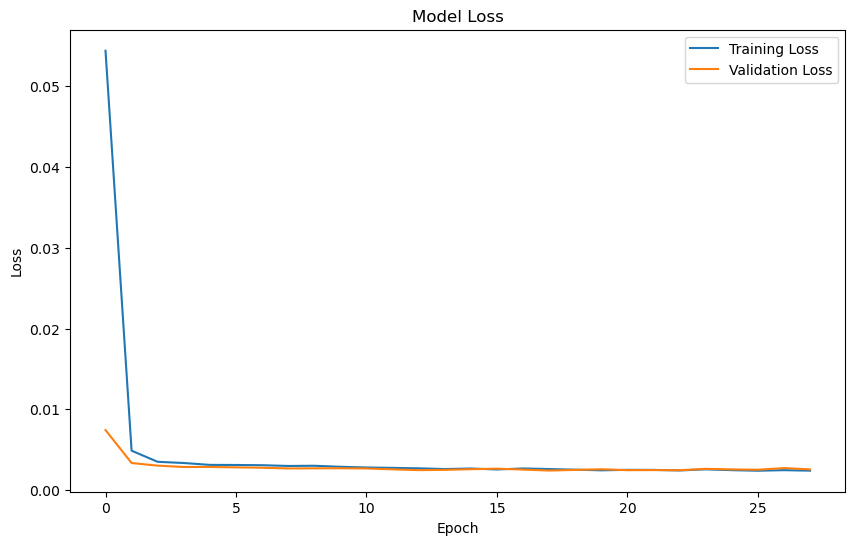

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56853    11]
 [   20    78]]


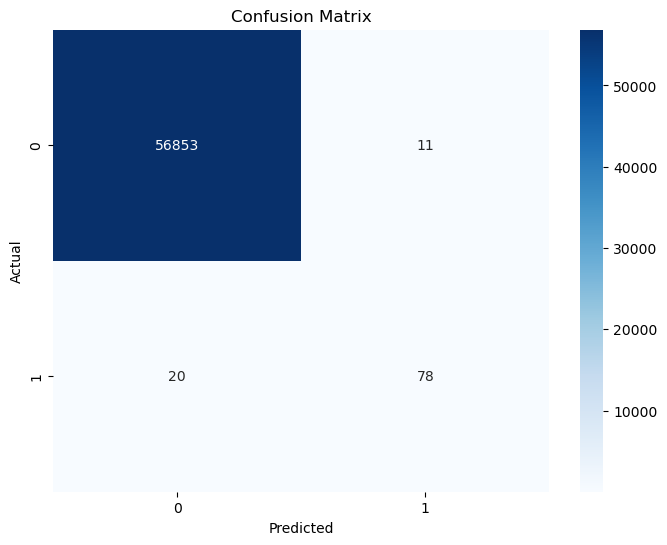

In [17]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Loss Plot: The loss plot shows how the model's performance improves over time. A decreasing trend in both training and validation loss indicates the model is learning. If the validation loss starts increasing while training loss continues to decrease, it may indicate overfitting.

Accuracy: Compare training and test accuracies. A significant difference might suggest overfitting. However, in fraud detection, accuracy alone can be misleading due to class imbalance.

Confusion Matrix: For fraud detection:

True Negatives (TN): Correctly identified non-fraudulent transactions

False Positives (FP): Non-fraudulent transactions incorrectly flagged as fraudulent

False Negatives (FN): Fraudulent transactions missed by the model (most critical in fraud detection)

True Positives (TP): Correctly identified fraudulent transactions

Additional Metrics: Consider precision, recall, and F1-score, especially for the minority class (fraudulent transactions). Recall is particularly important in fraud detection to minimize missed fraudulent transactions.

Remember, in fraud detection, the cost of false negatives (missed frauds) is typically much higher than false positives. Therefore, you might need to adjust the classification threshold or use techniques like oversampling to improve the model's ability to detect fraudulent transactions.

# Imbalance data

Even though I am increasing the number of nodes there is still wrong predictions i.e., the fraudlent calls are predicted as non fraudlent (24 predictions). 

Our objective is predicting the fraudlent calls, the major cause of this wrong predictions is because of imbalance data. as we have >99% of nonfraudlant data. the model is not balanced and giving wrong prediction for minor class. 


Thus, here we are using SMOTE (Synthetic Minority Over-sampling Technique):

In [18]:
pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

Epoch 1/100


C:\Users\Subhadra_Princess\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11373/11373 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9407 - loss: 0.1613 - val_accuracy: 0.9431 - val_loss: 0.1232
Epoch 2/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9705 - loss: 0.0774 - val_accuracy: 0.9619 - val_loss: 0.0758
Epoch 3/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9774 - loss: 0.0567 - val_accuracy: 0.9734 - val_loss: 0.0496
Epoch 4/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9817 - loss: 0.0453 - val_accuracy: 0.9850 - val_loss: 0.0350
Epoch 5/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9857 - loss: 0.0374 - val_accuracy: 0.9882 - val_loss: 0.0287
Epoch 6/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9873 - loss: 0.0326 - val_accuracy: 0.9897 - val_loss: 0.0268
Epoch 7/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9890 - loss: 0.0297 - val_accuracy: 0.9950 - val_loss: 0.0181
Epoch 8/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.98

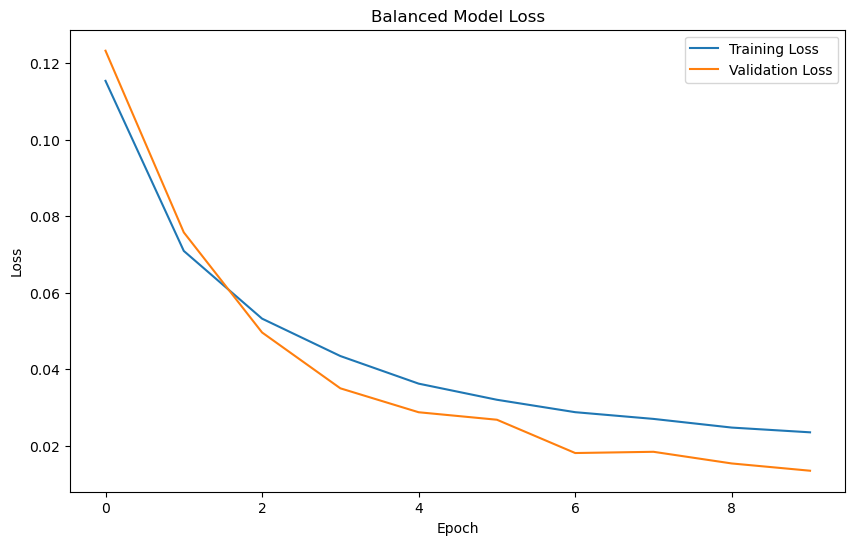

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step
Classification Report (Balanced Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix (Balanced Model):
[[56281   583]
 [    9    89]]


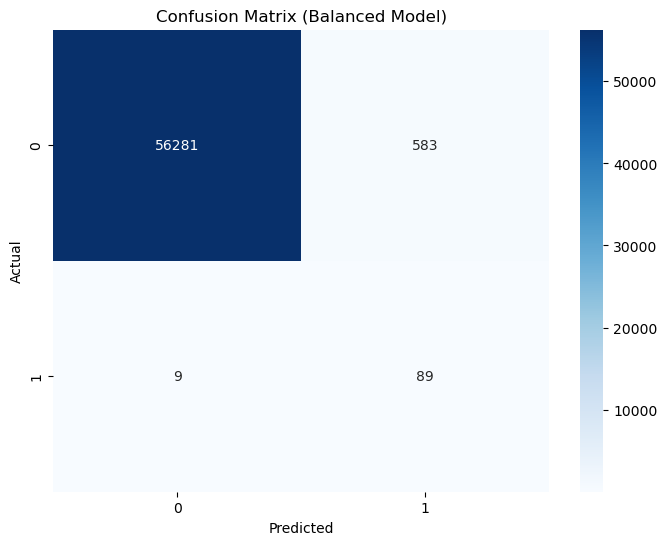

In [20]:

# Build and train the model with balanced data
model_balanced = Sequential([
    Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='sigmoid'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_balanced = model_balanced.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot training history for balanced model
plt.figure(figsize=(10, 6))
plt.plot(history_balanced.history['loss'], label='Training Loss')
plt.plot(history_balanced.history['val_loss'], label='Validation Loss')
plt.title('Balanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the balanced model
y_pred_balanced = model_balanced.predict(X_test_scaled)
y_pred_classes_balanced = (y_pred_balanced > 0.5).astype(int)

print("Classification Report (Balanced Model):")
print(classification_report(y_test, y_pred_classes_balanced))

print("Confusion Matrix (Balanced Model):")
print(confusion_matrix(y_test, y_pred_classes_balanced))

# Plot confusion matrix for balanced model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_balanced), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/100


C:\Users\Subhadra_Princess\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9370 - loss: 0.1654 - val_accuracy: 0.9422 - val_loss: 0.1233
Epoch 2/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9701 - loss: 0.0779 - val_accuracy: 0.9628 - val_loss: 0.0783
Epoch 3/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9792 - loss: 0.0542 - val_accuracy: 0.9800 - val_loss: 0.0413
Epoch 4/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9842 - loss: 0.0415 - val_accuracy: 0.9851 - val_loss: 0.0332
Epoch 5/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9868 - loss: 0.0356 - val_accuracy: 0.9922 - val_loss: 0.0250
Epoch 6/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9894 - loss: 0.0296 - val_accuracy: 0.9943 - val_loss: 0.0184
Epoch 7/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9903 - loss: 0.0269 - val_accuracy: 0.9947 - val_loss: 0.0161
Epoch 8/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.99

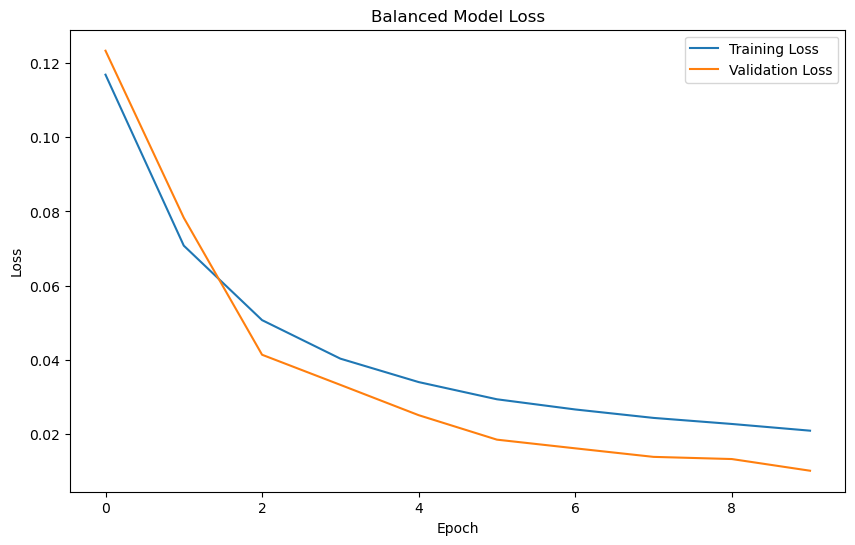

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step
Classification Report (Balanced Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix (Balanced Model):
[[56191   673]
 [    9    89]]


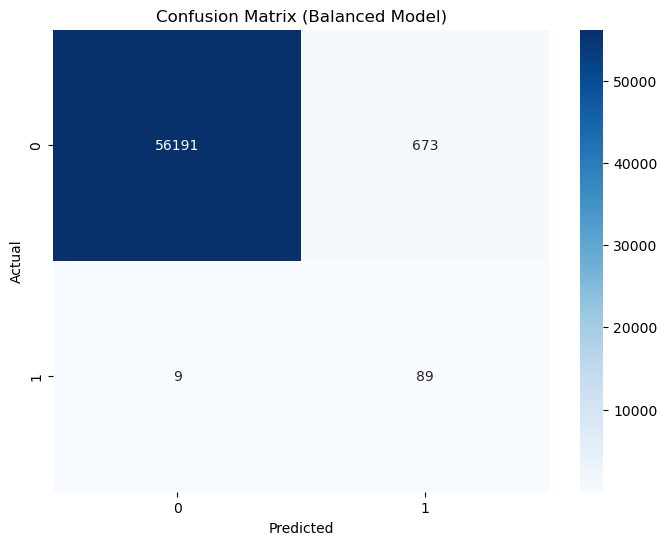

In [21]:
# Build and train the model with balanced data
model_balanced = Sequential([
    Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_balanced = model_balanced.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot training history for balanced model
plt.figure(figsize=(10, 6))
plt.plot(history_balanced.history['loss'], label='Training Loss')
plt.plot(history_balanced.history['val_loss'], label='Validation Loss')
plt.title('Balanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the balanced model
y_pred_balanced = model_balanced.predict(X_test_scaled)
y_pred_classes_balanced = (y_pred_balanced > 0.5).astype(int)

print("Classification Report (Balanced Model):")
print(classification_report(y_test, y_pred_classes_balanced))

print("Confusion Matrix (Balanced Model):")
print(confusion_matrix(y_test, y_pred_classes_balanced))

# Plot confusion matrix for balanced model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_balanced), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In credit card fraud, false negatives are generally considered more critical than false positives because a false negative means a fraudulent transaction is mistakenly allowed to go through, resulting in direct financial loss to the cardholder and the issuing bank, while a false positive only inconveniences a legitimate customer by temporarily blocking a transaction that is later verified as valid